In [40]:
# ДЗ 2
# Зашумить изображение при помощи шума гаусса, постоянного шума.
# Протестировать медианный фильтр, фильтр гаусса, билатериальный фильтр, фильтр нелокальных средних с различными параметрами.
# Выяснить, какой фильтр показал лучший результат фильтрации шума.

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim, mean_squared_error

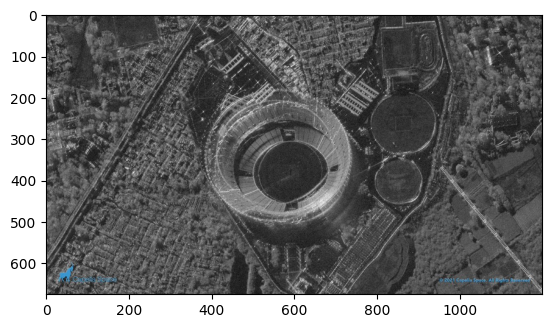

In [42]:
image = cv2.imread('sar_1.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image)

Шум Гаусса

In [43]:
mean = 0
stddev = 30
noise_gauss = np.zeros(image_gray.shape, dtype=np.float32) #нулевой массив размера изображения
cv2.randn(noise_gauss, mean, stddev)

array([[ 4.1106934e+01,  5.2370403e+01, -4.3004890e+01, ...,
         9.1336164e+00,  6.8117552e+00, -2.3335781e+01],
       [ 1.9529675e+01,  2.5071381e+01,  1.9528271e+01, ...,
        -1.6213384e-01, -4.3640877e+01, -2.2983315e+01],
       [ 1.0148719e+01, -3.9686935e+01,  1.1319800e+01, ...,
        -2.0546093e+00,  2.2206379e+01,  1.8148111e+01],
       ...,
       [ 1.3668847e+01,  4.5209797e+01, -1.7526869e+01, ...,
         5.9116627e+01,  4.6476994e-02,  8.8501329e+00],
       [-3.4920525e+01, -1.1352321e+01,  1.7126841e+01, ...,
         3.8481411e+01,  1.8984053e+01,  5.3073330e+00],
       [-4.7859859e+01, -2.4696939e+00, -1.4110006e+01, ...,
         6.7469299e+01,  1.9772837e+01, -2.6174147e+01]],
      shape=(675, 1200), dtype=float32)

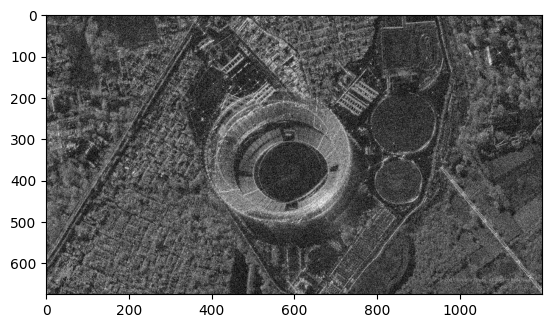

In [44]:
noisy_image = image_gray.astype(np.float32) + noise_gauss
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
plt.imshow(noisy_image, cmap='gray')

Постоянный шум

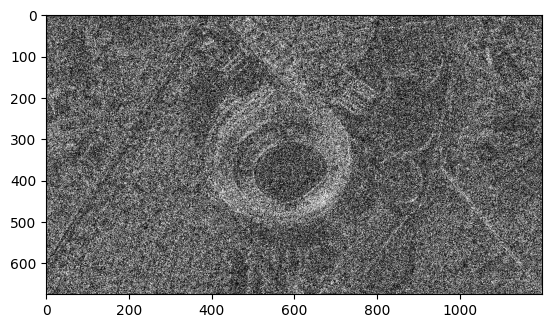

In [45]:
a = -210
b = 210

noise_uniform = np.random.uniform(a, b, image_gray.shape).astype(np.float32)

noisy_image_uniform = image_gray.astype(np.float32) + noise_uniform
noisy_image_uniform = np.clip(noisy_image_uniform, 0, 255).astype(np.uint8)
plt.imshow(noisy_image_uniform, cmap='gray')

## Тестирование алгоритмов подавления шума

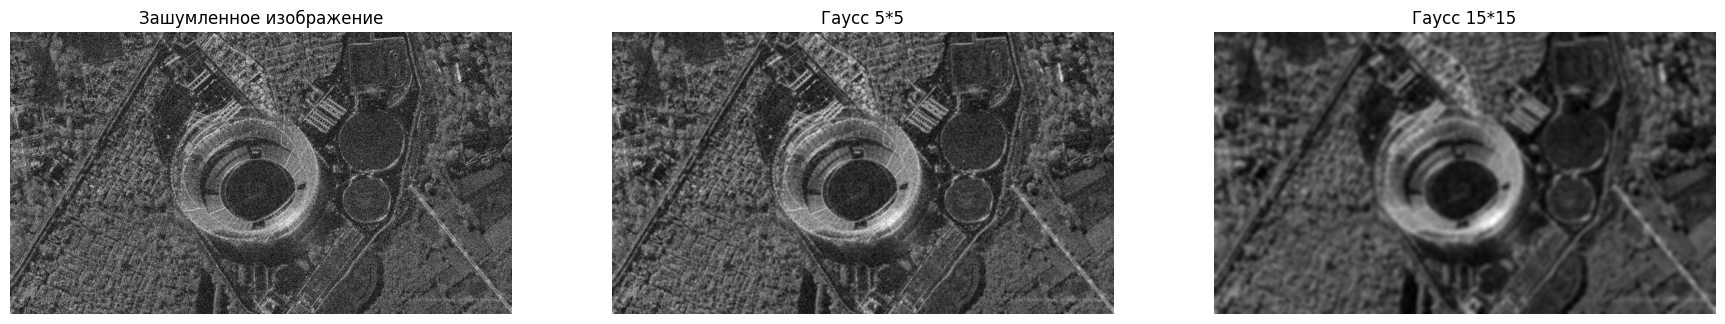

In [46]:
mse_values = []
ssim_values = []
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_gauss = cv2.GaussianBlur(noisy_image, (5, 5), 0)
plt.axis('off')
plt.title('Гаусс 5*5')
plt.imshow(image_gauss_gauss, cmap='gray')
plt.subplot(1,3,3)
image_gauss_gauss1 = cv2.GaussianBlur(noisy_image, (15, 15), 5)
plt.axis('off')
plt.title('Гаусс 15*15')
plt.imshow(image_gauss_gauss1, cmap='gray')


In [47]:
mse_gauss = mean_squared_error(image_gray, image_gauss_gauss)
(ssim_gauss, diff) = ssim(image_gray, image_gauss_gauss, full=True)
mse_values.append(mse_gauss)
ssim_values.append(ssim_gauss)
print(mse_gauss, ssim_gauss)

176.04313456790123 0.6782210284789009


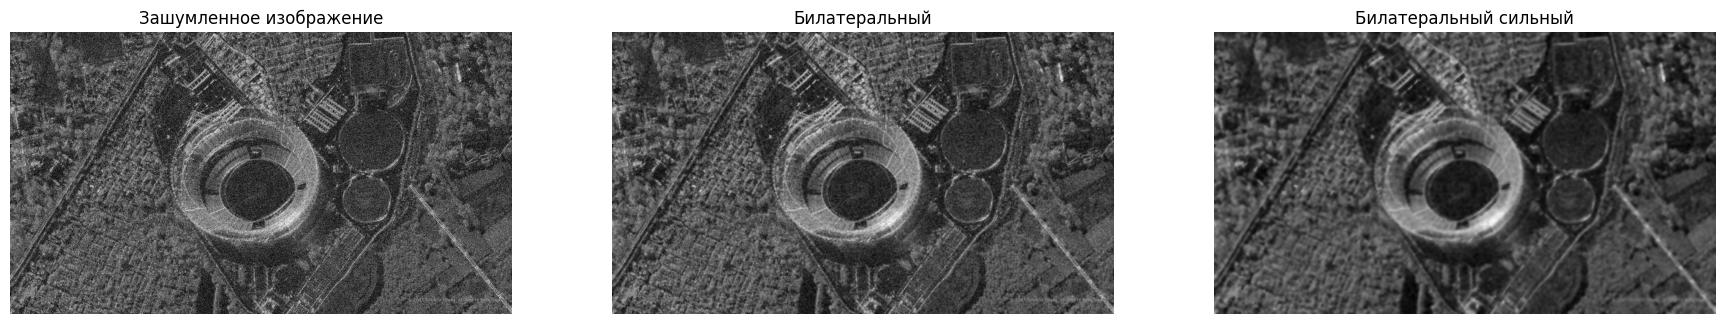

In [48]:
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_bilat = cv2.bilateralFilter(noisy_image, 5, 75, 75)
plt.imshow(image_gauss_bilat, cmap='gray')
plt.axis('off')
plt.title('Билатеральный')
plt.subplot(1,3,3)
image_gauss_bilat1 = cv2.bilateralFilter(noisy_image, 10, 100, 100)
plt.imshow(image_gauss_bilat1, cmap='gray')
plt.axis('off')
plt.title('Билатеральный сильный')
plt.show()

In [49]:
mse_bilat = mean_squared_error(image_gray, image_gauss_bilat)
(ssim_bilat, diff) = ssim(image_gray, image_gauss_bilat, full=True)
mse_values.append(mse_bilat)
ssim_values.append(ssim_bilat)
print(mse_bilat, ssim_bilat)

186.53394938271606 0.6661674937307129


Фильтр нелокальных средних

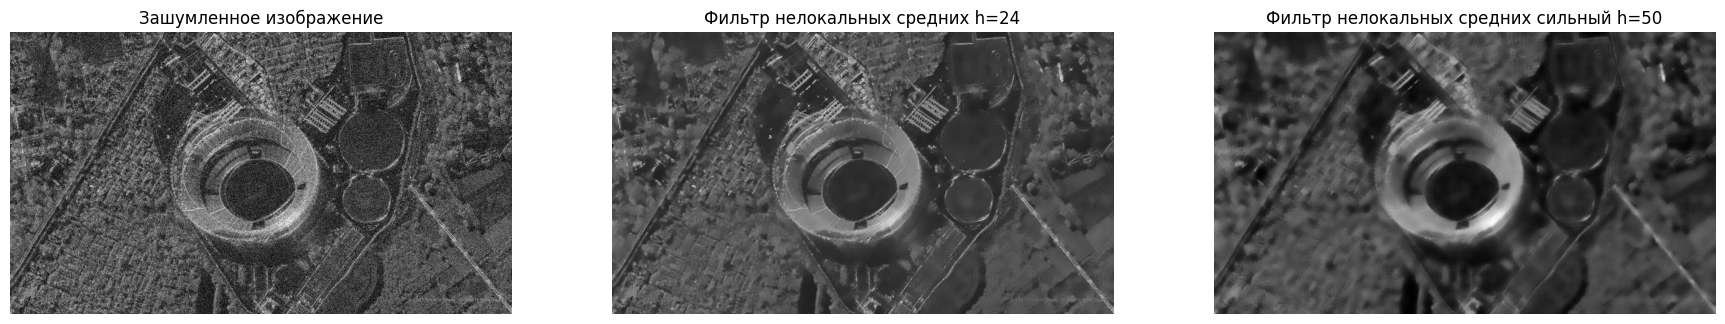

In [50]:
plt.figure(figsize=(22, 6))
plt.subplot(1,3,1)
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')
plt.title('Зашумленное изображение')
plt.subplot(1,3,2)
image_gauss_nlm = cv2.fastNlMeansDenoising(noisy_image, h = 24)
plt.imshow(image_gauss_nlm, cmap='gray')
plt.axis('off')
plt.title('Фильтр нелокальных средних h=24')
plt.subplot(1,3,3)
image_gauss_nlm1 = cv2.fastNlMeansDenoising(noisy_image, h = 50)
plt.imshow(image_gauss_nlm1, cmap='gray')
plt.axis('off')
plt.title('Фильтр нелокальных средних сильный h=50')
plt.show()

In [51]:
mse_nlm = mean_squared_error(image_gray, image_gauss_nlm,)
(ssim_nlm, diff) = ssim(image_gray, image_gauss_nlm, full=True)
mse_values.append(mse_nlm)
ssim_values.append(ssim_nlm)
print(mse_nlm, ssim_nlm)

207.44894197530863 0.6142232984076904


Наилучшая характеристика

In [52]:
best_mse = min(mse_values)
best_ssim = min(ssim_values)
print(best_mse, best_ssim)
if (best_mse == mse_gauss):
    print("Фильтр Гаусса лучше")
if (best_mse == mse_bilat):
    print("Билатеральный фильтр лучше")
if (best_mse == mse_nlm):
    print("НС")

176.04313456790123 0.6142232984076904
Гаусс
